<a href="https://colab.research.google.com/github/danielahernandz/Series-de-tiempo-avanzado/blob/main/Pronostico_Y_TecnicasSuavizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Técnicas de Suavizado

In [2]:
import pandas as pd
import numpy as np

airline= pd.read_csv('airline_passengers.csv', index_col=0, parse_dates=True)
#dropna borrar datos null

In [3]:
airline.dropna(inplace= True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


##PROMEDIO MOVIL SIMPLE /SMA: simple moving average

Es un promedio aritmetico de n períodos atrás.

Donde Ai son los valores de la variable:    


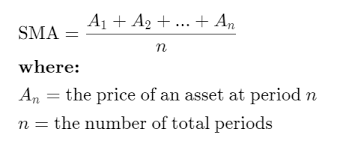

In [4]:
airline['6-month-SMA']= airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA']= airline['Thousands of Passengers'].rolling(window=12).mean()

In [5]:
airline.head(15)

,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


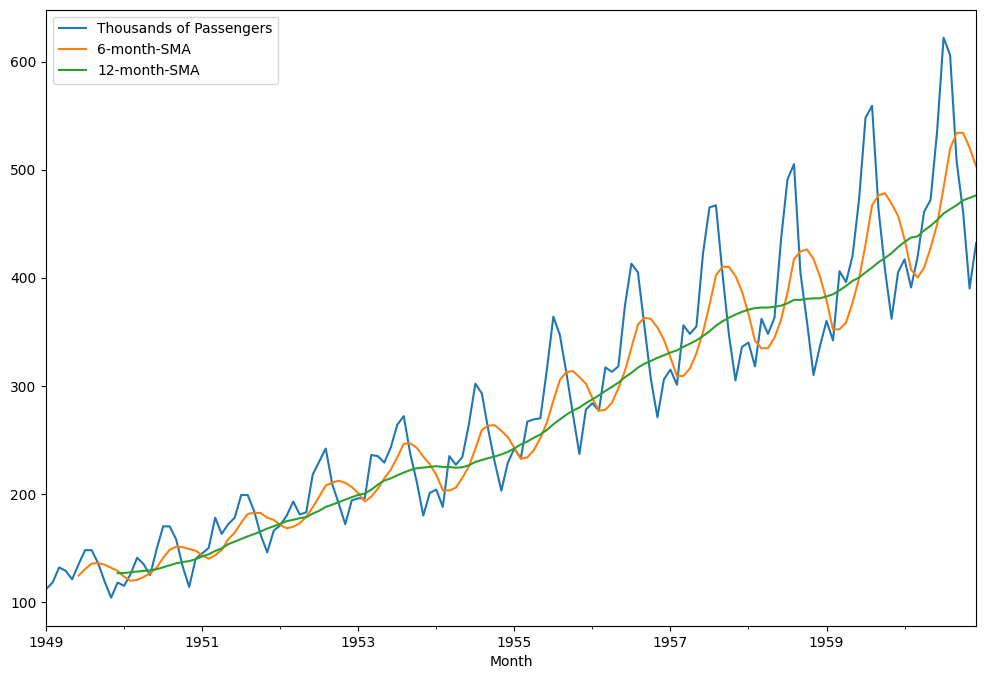

In [6]:
airline.plot(figsize = (12,8));
#SMA le da el mismo peso o importancia a todos los valores hacia atras, ejemplo el mes anterior al de hace 4 periodos atrás
#En la practica los meses o periodos más proximos al valor presente tengan más peso.

##EWNA: PROMEDIO MOVIL PONDERADO EXPONENCIALMENTE

#Nos permite reducir el efecto de retraso de SMA y pondrá más peso en los valores que ocurrieron más recientemente.

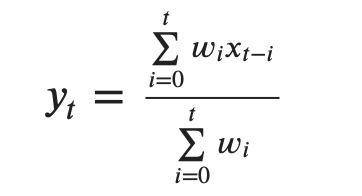

Cada vez que elevo (1-alpha) a un exponencial mayor, más pequeño se hace el peso Wi

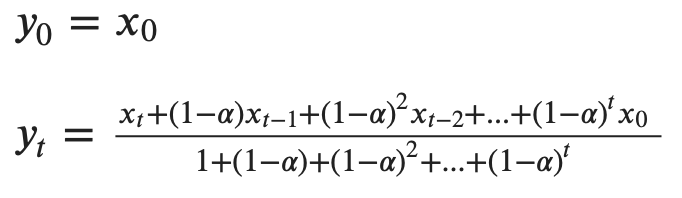

#Para definir los pesos: depende del argumento **adjust** dentro de la función .ewm(). adjust=True(por defecto) los pesos se calculan con esta ecuación wi= (..)xt-1..

#Cuando adjust=False las estimaciones se calculan como:

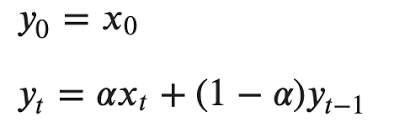

##Que es equivalente a usar estos pesos: 
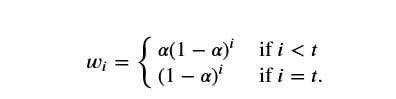

#El valor de suavizado:  0< alpha />1, se debe pensar en el alpha como una función de estos tres factores: 

Alguno de estos parametros se debe pasar a la función y se calculara el alpha con distinta ecuación.

1. Span(corresponde a promedio movil de N-periodos) 
2. Centro de masa/Center of mass(c=(s-1)/2)

3. Vida media/half-life(periodo de tiempo para que el peso exponencial se reduzca a la mitad) 
4. Alpha(parametro de suavizado directo). 



In [7]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12, adjust=False).mean()
airline

,Thousands of Passengers,6-month-SMA,12-month-SMA,EWMA12
Month,,,,
1949-01-01,112,NaN,NaN,112.000000
1949-02-01,118,NaN,NaN,112.923077
1949-03-01,132,NaN,NaN,115.857988
1949-04-01,129,NaN,NaN,117.879836
1949-05-01,121,NaN,NaN,118.359861
...,...,...,...,...
1960-08-01,606,519.166667,463.333333,494.898619
1960-09-01,508,534.000000,467.083333,496.914216
1960-10-01,461,534.000000,471.583333,491.388952


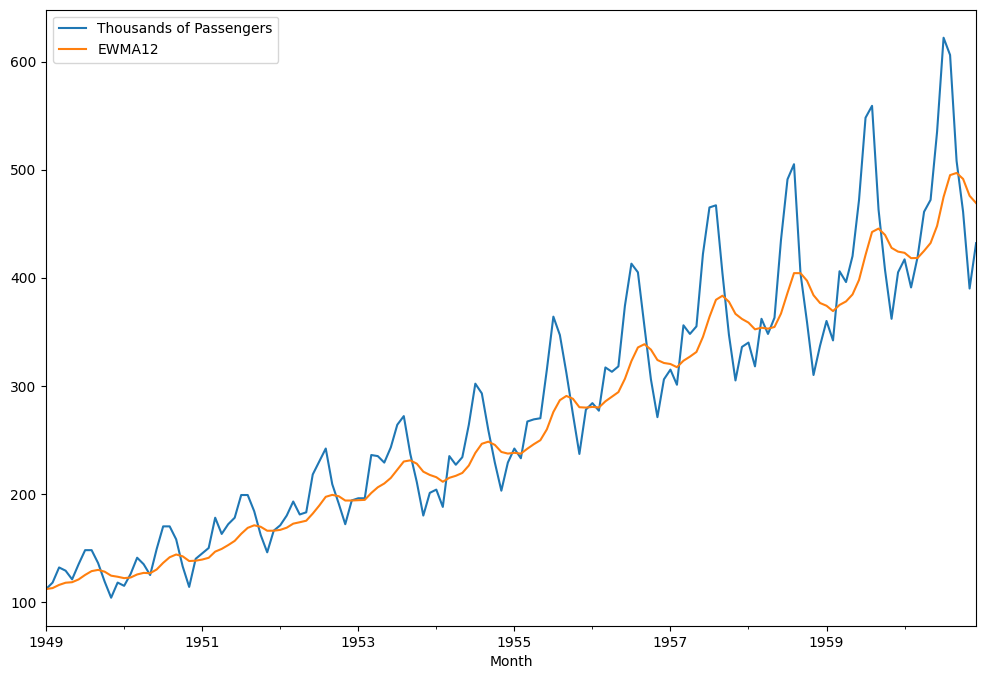

In [8]:
airline[['Thousands of Passengers', 'EWMA12']].plot(figsize=(12,8));

##Comparación de SMA/EWMA

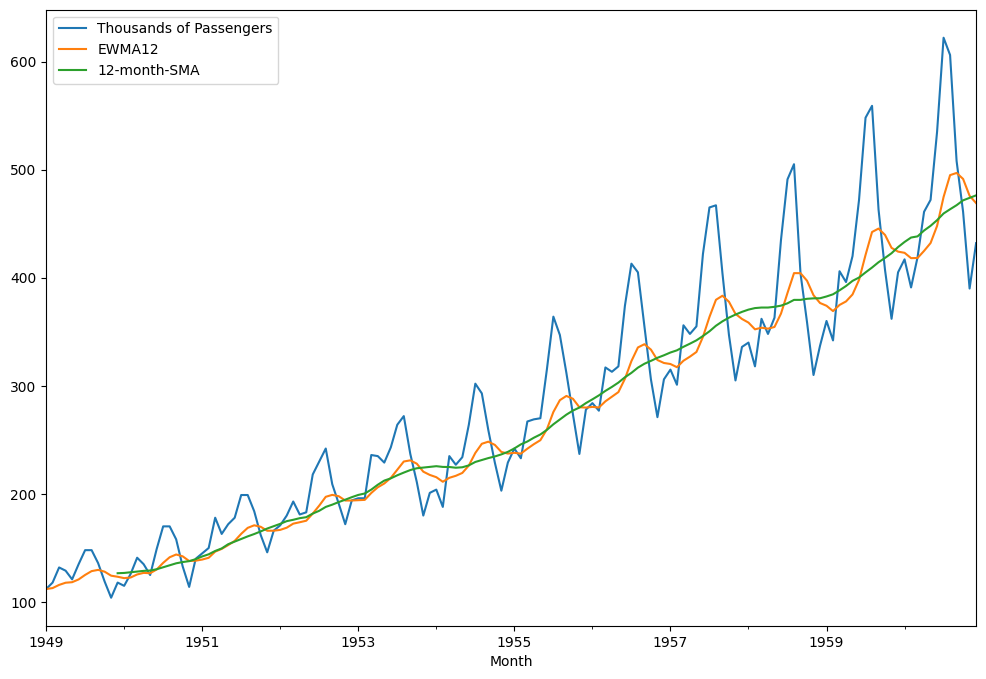

In [9]:
airline[['Thousands of Passengers', 'EWMA12', '12-month-SMA']].plot(figsize=(12,8));

##Suavizado exponencial simple
En este caso hemos trabajado con una especia de suavizado exponencial simple con un factor de suavizado alpha. Desafortunadamente, esta tecnica hace un regular trabajo de pronostico cuando una tendencia en los datos como se ve arriba, para un mejor pronostico se trabaja con suavizado exponencial doble y triple con el metodo Holt-Winters.

#Holt-Winters Methods 
##Este metodo a diferencia del suavizado exponencial simple tiene en cuenta: Tendencia y estacionalidad.

##Como el Suavizado exponencial doble(tambien conocido como Método de Holt) presentamos un nuevo factor de suavizado B(beta) que aborda la tendencia. 

##Suavizado exponencial doble y triple con los Métodos Holt-Winters. 

## En el Suavizado exponencial doble(tambien conocido como Método de Holt) presentamos un nuevo factor de suavizado B(beta) que aborda la tendencia: 

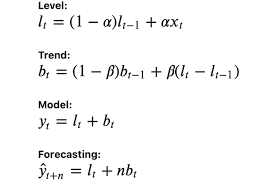


##Con el suavizado exponencial triple presentamos un factor de suavizado (gamma) que aborda la estacionalidad:

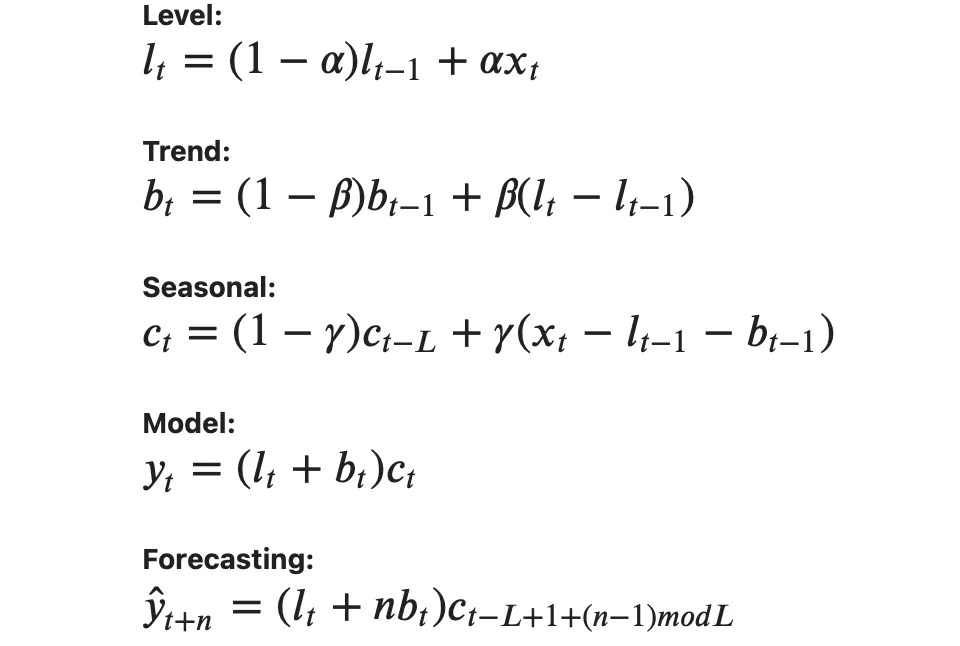 

Aqui L representa el número de divsiones por ciclo. En este caso, observando los daots mensuales que muestran un patrón repetitivo cada año, usamos L=12.

En general, los valores más altos para gamma, betta, alpha (valores más cercanos a 1) ponen más enfasis en los datos recientes.

Funciones:

statsmodels.tsa.holtwinters.SimpleExpSmoothing

statsmodels.tsa.holtwinters.ExponentialSmoothing


In [10]:
%matplotlib inline

In [11]:
df = pd.read_csv('airline_passengers.csv', index_col=0, parse_dates=True)
df.dropna(inplace=True)
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [12]:
#Definimos la freq como mensual
df.index.freq = 'MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [13]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


#Suavizado exponencial simple

##La función del suavizado exponencial simple de statsmodels realiza las mismas estimaciones que el método de promedios ponderados de pandas:

Nota: la función statsmodels SimpleExpSmoothing desplaza los valores ajustados una fila hacia abajos, se arregla esto con .shift(-1) despues de .fittedvalues.

In [15]:
#Calculamos el SES con el metodo .ewm (antiguo metodo) y tambien con metodo SimpleExpSmoothing que
#es lo mismo un promedio ponderado movil que un suavizado exponencial simple

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 12
alpha= 2/(span+1) #se le pasa este alfa, optimizado=false  no calcula metodo de maxima verosimilitud #si es true no da igual los 2 metodos.

df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha = alpha, adjust=False).mean()
#con ses se ajusta .fit con el parametro
#.fittedvalues se obtienen los valores de ajuste del modelo y .shift(-1) para que los valores no se corran 1fila abajo.
df['SES12']=SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha, optimized=False).fittedvalues.shift(-1)
df.head()


,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


#Suavizado exponencial doble 

###Cuando el suavizado exponencial simple emplea solo un factor de suavizado alpha, el suavizado exponencial doble agrega un segundo factor de suavizado B(beta) que aborda la tendencias en los datos. Al igual que el factor alpha, los valores del factor beta estan entre cero y uno (0 <B/>1). **El beneficio aquí es que el modelo puede anticipar futuros aumentos o disminuciones ** donde el modelo de un solo factor solotendría en cuentas los valores más recientes. 

###Tambien podemos abordar diferentes tipos de cambio(crecimiento/decadencia) en la tendencia. **Si una serie temporal muestra una tendencia inclinada en linea recta, se usaría un ajuste aditivo. Si la serie temporal muestra una tendencia exponencial(curva), se usaría un ajuste multiplicativo.**




In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
#agrega la tendencia adempas de tener en cuenta el peso de los valores
df['DESadd12']= ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12,DESadd12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.102394
1949-02-01,118,112.923077,112.923077,120.040657
1949-03-01,132,115.857988,115.857988,134.001539
1949-04-01,129,117.879836,117.879836,131.085845
1949-05-01,121,118.359861,118.359861,123.110263


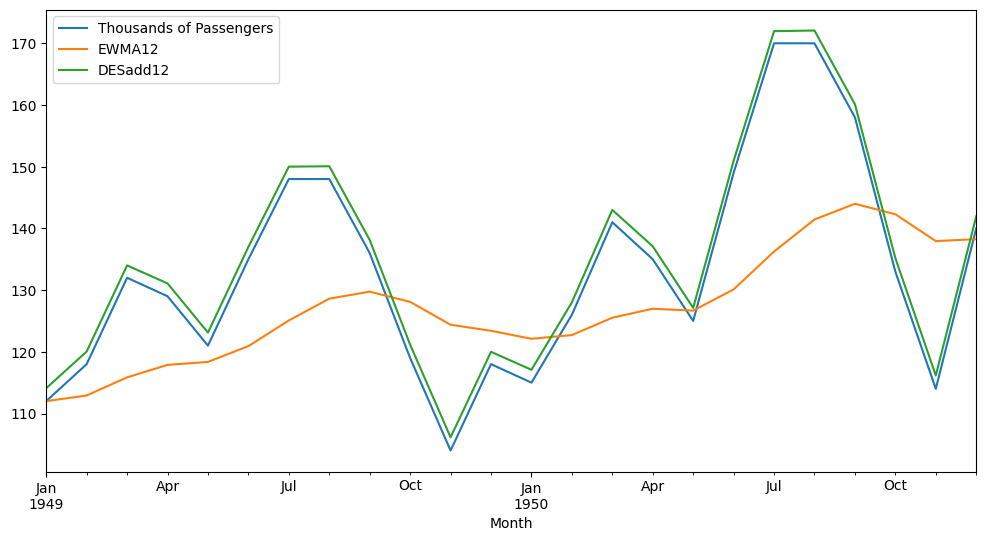

In [18]:
#iloc[:24] se escogio la ventana temporal de 24, es decir los 2 primeros años: datos no va desde 1949 hasta 1960
df[['Thousands of Passengers', 'EWMA12', 'DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x', tight=True);

#Se observa que este suavizado doble promedia logrando una tendencia casi identica a el valor real de los datos. 



Aqui podemos ver que con el suavizado exponencial doble obtenemos una mejor representación de los datos. Veamos si usar un ajuste estacional multiplicativo ayuda. 


In [19]:
df['DESmul12']= ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701
1949-02-01,118,112.923077,112.923077,120.040657,120.031669
1949-03-01,132,115.857988,115.857988,134.001539,134.235979
1949-04-01,129,117.879836,117.879836,131.085845,131.270786
1949-05-01,121,118.359861,118.359861,123.110263,123.156267


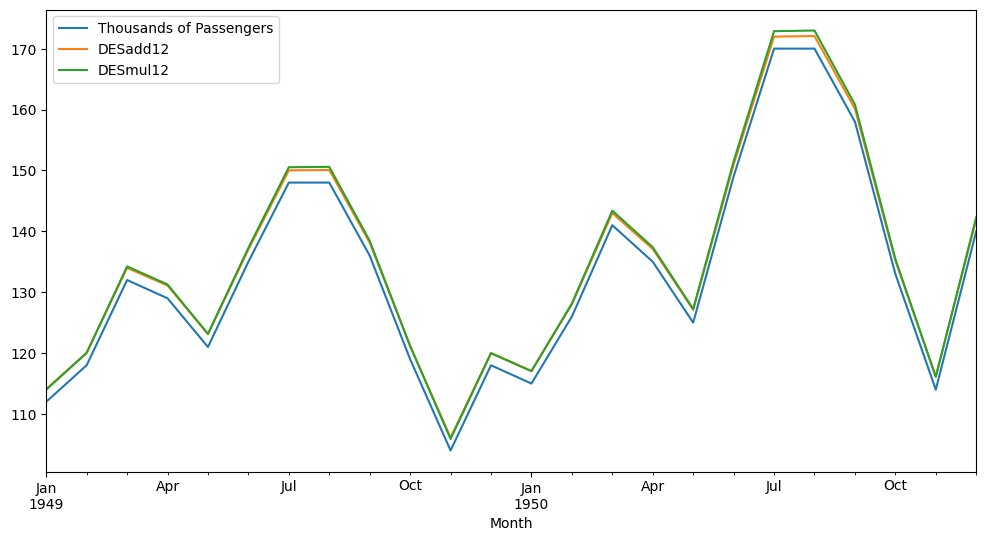

In [20]:
df[['Thousands of Passengers', 'DESadd12', 'DESmul12']].iloc[:24].plot(figsize=(12,6));
#con mul se acerca un poquito más la diferencia es poca

Aunque se obtienen valores un poco menores que los valores reales, parece que un ajuste multiplicativo da mejores resultados teniendo en cuenta que la linea verde se superpone casi por completo a los datos originales. 

#Suavizado exponencial triple

###Suavizado exponencial triple o Holt-Winters, añade soporte para la tendencia y la estacionalidad.

In [21]:
#El suvizado triple nos brinda un poquito más de exactitud en referencia al doble agregrando el componente no solo de
#tendencia sino tambien de estacionalidad.

df['TESadd12']= ExponentialSmoothing(df['Thousands of Passengers'], trend='add', seasonal='add', seasonal_periods=12).fit().fittedvalues
df.head()

,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701,111.959998
1949-02-01,118,112.923077,112.923077,120.040657,120.031669,120.193337
1949-03-01,132,115.857988,115.857988,134.001539,134.235979,134.676835
1949-04-01,129,117.879836,117.879836,131.085845,131.270786,131.407263
1949-05-01,121,118.359861,118.359861,123.110263,123.156267,124.643743


In [22]:
df['TESmul12']= ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues
df.head()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701,111.959998,111.595648
1949-02-01,118,112.923077,112.923077,120.040657,120.031669,120.193337,118.842606
1949-03-01,132,115.857988,115.857988,134.001539,134.235979,134.676835,133.333853
1949-04-01,129,117.879836,117.879836,131.085845,131.270786,131.407263,127.899963
1949-05-01,121,118.359861,118.359861,123.110263,123.156267,124.643743,120.979016


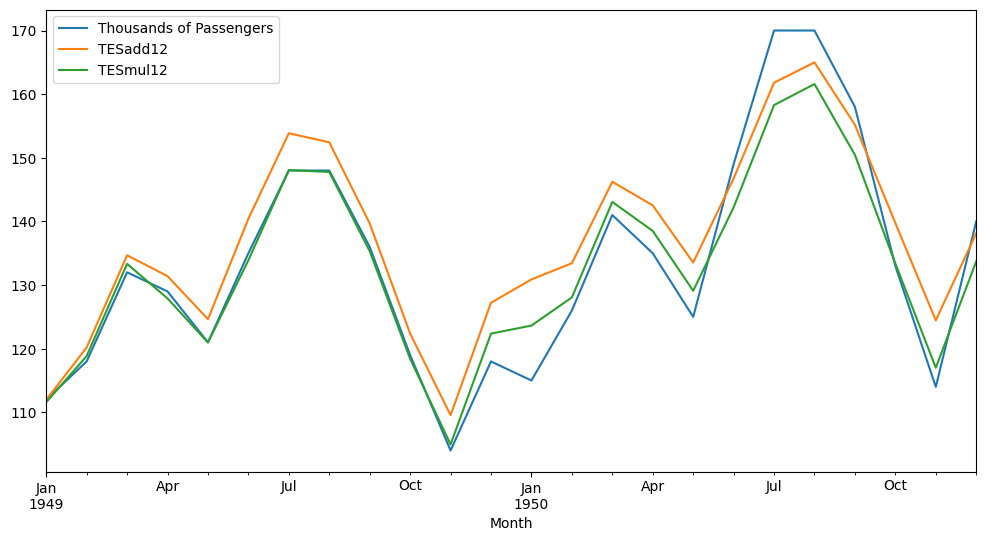

In [27]:
df[['Thousands of Passengers', 'TESadd12', 'TESmul12']].iloc[:24].plot(figsize=(12,6));
#Triplesuavizado brinda casi identico el patron con los datos orginales es la que más se la acerca pudiendo realizar un pronostico adecuado

##Para realizar predicciones a futuro, asignamos cada método a un modelo, y realizamos el pronostico con la función forecast(con la ventana temporal que deseamos)

In [28]:
model_add = ExponentialSmoothing(df['Thousands of Passengers'], trend='add', seasonal='add', seasonal_periods=12).fit()


In [ ]:
model_mul = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

In [30]:
forecast_add = model_add.forecast(36)
forecast_mul = model_mul.forecast(36)

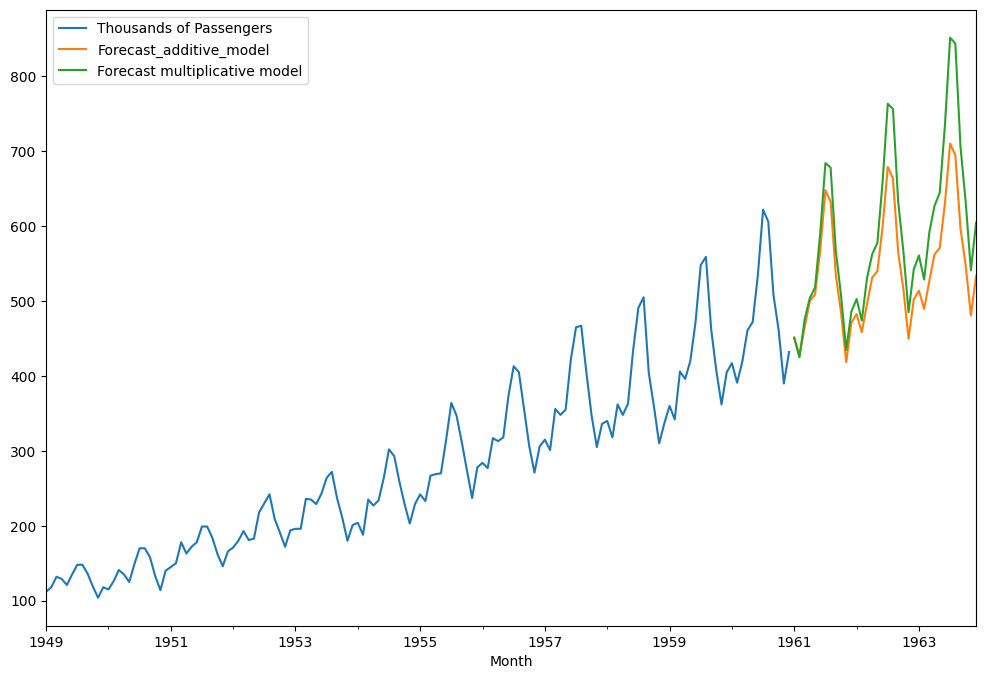

In [32]:
import matplotlib.pyplot as plt

df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_add.plot(label='Forecast_additive_model');
forecast_mul.plot(label='Forecast multiplicative model');
plt.legend(loc='upper left');